In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

# Data Cleaning/Preprocessing

In [31]:
file_path = r'C:\Users\chris\OneDrive\ds\_datasets\vg\videogames.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Origen,Tienda,Fabricante,Consola,Género,Título,Precio,Moneda,Disponibilidad
0,0,Mediamarkt,Mediamarkt,Capcom,PS5,Acción,Resident Evil VIII: Village Lenticular,42.99,EUR,True
1,1,Mediamarkt,Mediamarkt,Sony,PS5,Plataformas,Sackboy: A Big Adventure,59.99,EUR,True
2,2,Mediamarkt,Mediamarkt,Ubisoft,PS5,Acción,Tom Clancy's Rainbow Six Siege,9.99,EUR,True
3,3,Mediamarkt,Mediamarkt,Ubisoft,PS5,Acción,Assassin's Creed Valhalla: El Amanecer del Rag...,34.99,EUR,True
4,4,Mediamarkt,Mediamarkt,NaN,PS5,Terror,Yuoni,29.99,EUR,True


In [32]:
df.describe()

,Unnamed: 0
count,3586.00000
mean,1792.50000
std,1035.33336
min,0.00000
25%,896.25000
50%,1792.50000
75%,2688.75000
max,3585.00000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3586 non-null   int64 
 1   Origen          3586 non-null   object
 2   Tienda          3586 non-null   object
 3   Fabricante      3313 non-null   object
 4   Consola         1097 non-null   object
 5   Género          1060 non-null   object
 6   Título          3565 non-null   object
 7   Precio          3586 non-null   object
 8   Moneda          3586 non-null   object
 9   Disponibilidad  3586 non-null   object
dtypes: int64(1), object(9)
memory usage: 280.3+ KB


In [34]:
df.columns

Index(['Unnamed: 0', 'Origen', 'Tienda', 'Fabricante', 'Consola', 'Género',
       'Título', 'Precio', 'Moneda', 'Disponibilidad'],
      dtype='object')

In [35]:
df.shape

(3586, 10)

In [36]:
df.drop(['Unnamed: 0', 'Género'], axis = 1, inplace = True)
df.head()

,Origen,Tienda,Fabricante,Consola,Título,Precio,Moneda,Disponibilidad
0,Mediamarkt,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,42.99,EUR,True
1,Mediamarkt,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,59.99,EUR,True
2,Mediamarkt,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,9.99,EUR,True
3,Mediamarkt,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,34.99,EUR,True
4,Mediamarkt,Mediamarkt,NaN,PS5,Yuoni,29.99,EUR,True


In [37]:
df.rename(columns={'Origen': 'Format', 'Tienda': 'Retailer', 'Fabricante': 'Developer', 'Consola': 'Platform', 'Título': 'Title', 'Precio': 'Price', 'Moneda': 'Currency', 'Disponibilidad': 'Availability'}, inplace=True)
df.head()

,Format,Retailer,Developer,Platform,Title,Price,Currency,Availability
0,Mediamarkt,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,42.99,EUR,True
1,Mediamarkt,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,59.99,EUR,True
2,Mediamarkt,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,9.99,EUR,True
3,Mediamarkt,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,34.99,EUR,True
4,Mediamarkt,Mediamarkt,NaN,PS5,Yuoni,29.99,EUR,True


In [38]:
for i in range(len(df)):
    if df.loc[i, "Format"] == "Mediamarkt":
        df.loc[i, "Format"] = "Physical"
    elif df.loc[i, "Format"] == "CD Keys":
        df.loc[i, "Format"] = "Digital"
        
df.head()

,Format,Retailer,Developer,Platform,Title,Price,Currency,Availability
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,42.99,EUR,True
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,59.99,EUR,True
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,9.99,EUR,True
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,34.99,EUR,True
4,Physical,Mediamarkt,NaN,PS5,Yuoni,29.99,EUR,True


In [39]:
unique_retailer = df['Retailer'].unique()
unique_retailer

array(['Mediamarkt', 'Steam', 'Origin', 'PlayStation Network',
       'Xbox Live', 'Epic Games Launcher', 'Mojang', 'uPlay',
       'Windows 10', 'Rockstar Games Launcher', 'GOG.com', 'Battle.net',
       'Bethesda Launcher', 'ArenaNet', 'Battlestate Games Launcher',
       'The Elder Scrolls Online', 'Other', 'Call of Duty BETA', 'False',
       'Nintendo'], dtype=object)

In [40]:
pc_retailers = ['Steam', 'Origin', 'Epic Games Launcher', 'Mojang', 'Windows 10', 'GOG.com', 'Bethesda Launcher', 'Battle.net', 'ArenaNet', 'Battlestate Games Launcher', 'uPlay', 'Rockstar Games Launcher', 'Microsoft']

for index, row in df.iterrows():
    if row['Retailer'] in pc_retailers:
        df.at[index, 'Platform'] = 'PC'

for i in range(len(df)):
    if df.loc[i, "Retailer"] == "PlayStation Network":
        df.loc[i, "Platform"] = "PS5"
    elif df.loc[i, "Retailer"] == "Xbox Live":
        df.loc[i, "Platform"] = "Xbox Series X/S"
    elif df.loc[i, 'Retailer'] == 'Nintendo':
        df.loc[i, 'Platform'] = 'Nintendo Switch'
        
for i in range(len(df)):
    if df.loc[i, "Platform"] == "Xbox Series X y S":
        df.loc[i, "Platform"] = "Xbox Series X/S"

Decided to give Xbox Live titles the Xbox Series X/S designation for consistency, same with Playstation Network titles and PS5.

In [41]:
unique_console = df['Platform'].unique()
unique_console

array(['PS5', 'Xbox Series X/S', 'PS4', 'Xbox One', 'Nintendo Switch',
       'PC', 'PS3', 'Xbox 360', 'Wii', 'PS Vita', nan], dtype=object)

In [42]:
df[df['Platform'].isna()]

,Format,Retailer,Developer,Platform,Title,Price,Currency,Availability
1566,Digital,The Elder Scrolls Online,Bethesda Softworks,NaN,The Elder Scrolls Online: High Isle Collector'...,36.29,EUR,no
1613,Digital,Other,Ubisoft,NaN,Far Cry 6 Xbox / PC / PS - DLC,2.39,EUR,yes
1718,Digital,The Elder Scrolls Online,Bethesda,NaN,The Elder Scrolls Online: Blackwood Collector'...,17.99,EUR,yes
1911,Digital,Call of Duty BETA,Activision,NaN,Call of Duty: Vanguard Beta - Xbox / PC / PS,2.39,EUR,no
1941,Digital,False,Square Enix,NaN,Marvel's Avengers DLC PS4 (EU),1.19,EUR,yes
1943,Digital,False,EA Swiss Sarl,NaN,The Sims 4 - Eco Lifestyle Expansion Pack PS4 ...,38.69,EUR,no
1997,Digital,False,Microsoft,NaN,1 Mes Xbox Game Pass Ultimate Xbox One / PC (EU),9.69,EUR,yes
2032,Digital,False,Microsoft,NaN,1 Mes Xbox Game Pass Ultimate Xbox One / PC (EU),9.69,EUR,yes
2080,Digital,False,Microsoft,NaN,3 Month Xbox Game Pass Ultimate Xbox One / PC ...,28.99,EUR,yes
2353,Digital,False,False,NaN,DYNASTY WARRIORS 9 Empires Xbox One & Xbox Ser...,65.29,EUR,no


In [43]:
df.dropna(subset=['Platform'], inplace=True)
df[df['Platform'].isna()]

,Format,Retailer,Developer,Platform,Title,Price,Currency,Availability


Dropping the above outliers with NaN platform, they seem to be cross platform title listings and getting rid of them would not affect the analysis.

In [44]:
df["Availability"] = df["Availability"].replace({"True": True, "yes": True, "no": False}).astype(int)

#for i in range(len(df)):
#    if df.loc[i, "Availability"] == "True":
#        df.loc[i, "Availability"] = "1"
#    elif df.loc[i, "Availability"] == "yes":
#        df.loc[i, "Availability"] = "1"
#    elif df.loc[i, "Availability"] == "no":
#        df.loc[i, "Availability"] = "0"

df['Availability'].head()

0    1
1    1
2    1
3    1
4    1
Name: Availability, dtype: int32

In [45]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [46]:
df['Price'].info

<bound method Series.info of 0       42.99
1       59.99
2        9.99
3       34.99
4       29.99
        ...  
3581    39.89
3582    31.49
3583    18.09
3584    39.89
3585    20.59
Name: Price, Length: 3575, dtype: float64>

In [47]:
unique_currency = df['Currency'].unique()
unique_currency

array(['EUR', 'USD', 'ARS', 'MXN'], dtype=object)

In [48]:
conversion_factors = {
    'USD': 1.0,  # USD is the base currency, so conversion factor is 1.0
    'EUR': 1.18,  # 1 USD = 0.85 EUR, so conversion factor is 1.18
    'ARS': 0.011,  # 1 USD = 96.53 ARS, so conversion factor is 0.011
    'MXN': 0.050,  # 1 USD = 20.19 MXN, so conversion factor is 0.050
}

In [49]:
df['Price_USD'] = df.apply(lambda row: row['Price'] * conversion_factors[row['Currency']], axis=1)

In [50]:
df.head()

,Format,Retailer,Developer,Platform,Title,Price,Currency,Availability,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,42.99,EUR,1,50.7282
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,59.99,EUR,1,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,9.99,EUR,1,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,34.99,EUR,1,41.2882
4,Physical,Mediamarkt,NaN,PS5,Yuoni,29.99,EUR,1,35.3882


In [51]:
df['Price_USD'].info

<bound method Series.info of 0       50.7282
1       70.7882
2       11.7882
3       41.2882
4       35.3882
         ...   
3581    47.0702
3582    37.1582
3583    21.3462
3584    47.0702
3585    24.2962
Name: Price_USD, Length: 3575, dtype: float64>

In [52]:
df.drop(['Price', 'Currency'], axis = 1, inplace = True)
df.head()

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,1,50.7282
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,1,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,1,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,1,41.2882
4,Physical,Mediamarkt,NaN,PS5,Yuoni,1,35.3882


In [53]:
df[df['Price_USD'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
1843,Digital,Epic Games Launcher,2K,PC,Tiny Tina's Wonderlands PC,1,NaN
1844,Digital,Steam,Bethesda Softworks,PC,GhostWire: Tokyo PC,1,NaN
1845,Digital,Steam,Square Enix,PC,CHRONO CROSS: THE RADICAL DREAMERS EDITION PC,1,NaN
1846,Digital,Steam,Milestone S.r.l.,PC,MotoGP 22 PC,1,NaN
1871,Digital,Epic Games Launcher,2K,PC,Tiny Tina's Wonderlands PC,1,NaN
...,...,...,...,...,...,...,...
2820,Digital,PlayStation Network,Sony,PS5,PlayStation Plus - Suscripción de 12 meses (Re...,1,NaN
2822,Digital,Xbox Live,Xbox Game Studios,Xbox Series X/S,Forza Horizon 5 Premium Edition Xbox One/Xbox ...,1,NaN
2824,Digital,Nintendo,Nintendo,Nintendo Switch,Animal Crossing: New Horizons Switch (EU & UK),1,NaN
2826,Digital,Steam,Warner Bros. Interactive Entertainment,PC,LEGO Star Wars: The Skywalker Saga Deluxe Edit...,1,NaN


In [54]:
df.dropna(subset=['Price_USD'], inplace=True)
df[df['Platform'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD


In [55]:
df.head()

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,1,50.7282
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,1,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,1,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,1,41.2882
4,Physical,Mediamarkt,NaN,PS5,Yuoni,1,35.3882


In [56]:
df[df['Title'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
78,Physical,Mediamarkt,SEGA,PS5,NaN,1,47.1882
215,Physical,Mediamarkt,SEGA,Xbox Series X/S,NaN,1,30.6682
297,Physical,Mediamarkt,Capcom,PS4,NaN,1,18.8682
328,Physical,Mediamarkt,Capcom,PS4,NaN,1,20.0482
331,Physical,Mediamarkt,Monolith,PS4,NaN,1,23.5882
345,Physical,Mediamarkt,Ubisoft,PS4,NaN,1,22.4082
355,Physical,Mediamarkt,NaN,PS4,NaN,1,31.8482
379,Physical,Mediamarkt,Sega,PS4,NaN,1,34.2082
412,Physical,Mediamarkt,NaN,PS4,NaN,1,23.5882
425,Physical,Mediamarkt,NaN,PS4,NaN,1,21.2282


In [57]:
df.dropna(subset=['Title'], inplace=True)
df[df['Title'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD


In [58]:
df[df['Developer'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
4,Physical,Mediamarkt,NaN,PS5,Yuoni,1,35.3882
12,Physical,Mediamarkt,NaN,PS5,Spider-Man Miles Morales + Destruction Allstars,1,70.7882
14,Physical,Mediamarkt,NaN,PS5,GhostWire: Tokyo,1,82.5882
23,Physical,Mediamarkt,NaN,PS5,F1 2021,1,54.2682
24,Physical,Mediamarkt,NaN,PS5,Ghost of Tsushima,1,83.7682
...,...,...,...,...,...,...,...
1077,Physical,Mediamarkt,NaN,PS Vita,My Universe - Interior Designer,1,47.1882
1078,Physical,Mediamarkt,NaN,PS Vita,Minecraft Dungeons,1,44.8282
1087,Physical,Mediamarkt,NaN,PS Vita,PJ Masks: Héroes de la Noche,1,41.2882
1089,Physical,Mediamarkt,NaN,PS Vita,Rico London,1,37.7482


In [59]:
df.dropna(subset=['Developer'], inplace=True)
df[df['Developer'].isna()]

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD


All prices have been converted to USD values, NaN values have been dropped - there are more than enough entries in the dataset for it not to make a big difference; now proceed with EDA.

# EDA with Visualization

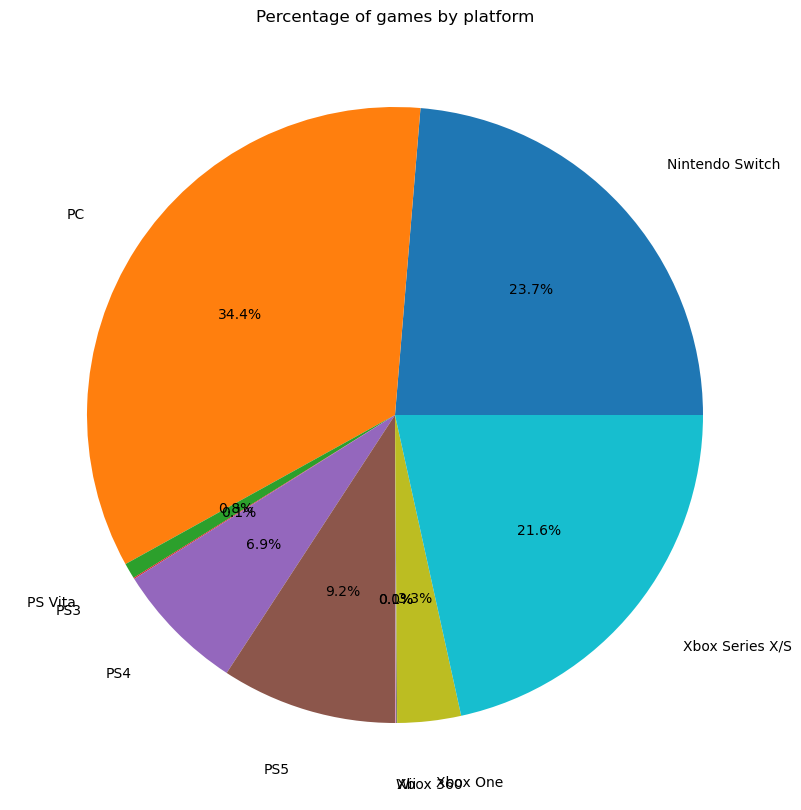

In [60]:
platform_counts = df.groupby('Platform').size()

fig = plt.figure(figsize=(10, 10))

plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', labeldistance=1.2)
plt.title('Percentage of games by platform')
plt.show()

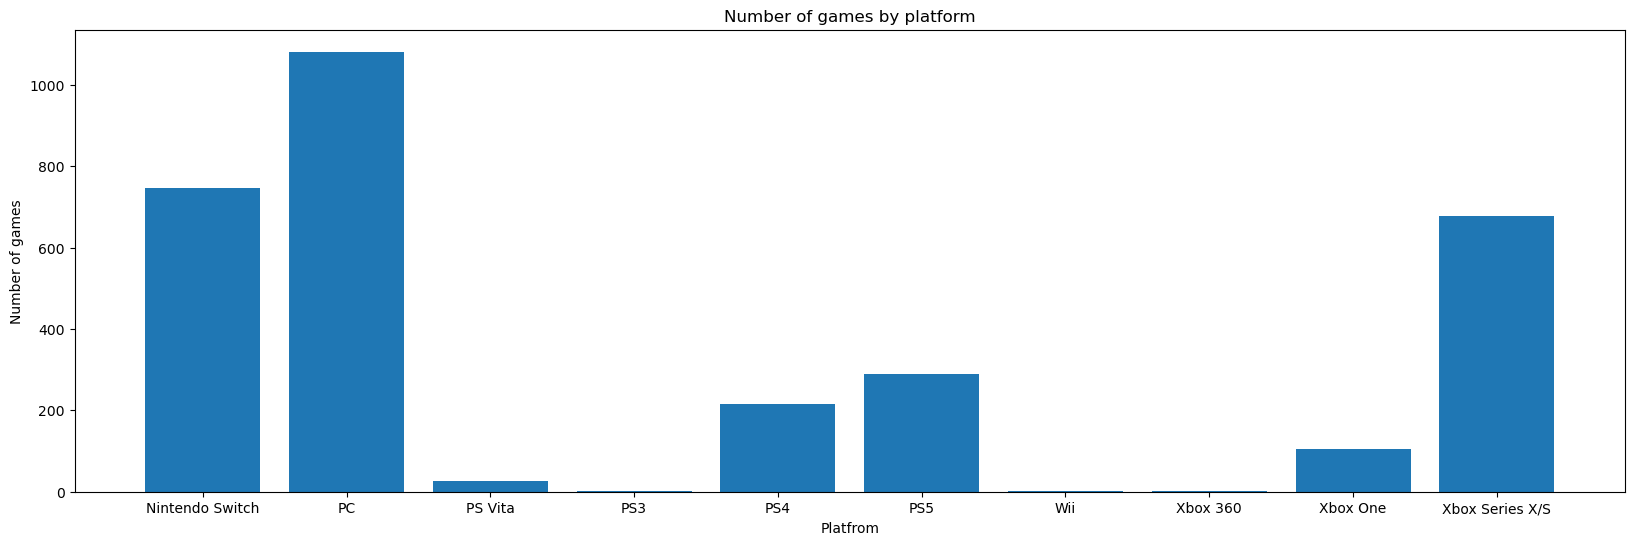

In [61]:
fig = plt.figure(figsize=(20, 6))

plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel('Platfrom')
plt.ylabel('Number of games')
plt.title('Number of games by platform')
plt.show()

We can observe from the charts above that the leading platforms based on the number of titles being offered are PC, Nintendo Switch and Xbox Series X/S.
PS4 and PS5 have a variety of games for purchase too, however their respective market share is much smaller. This can be explained by the COVID-19 pandemic, during which very limited amounts of PS5 consoles were available for purchase,
as well as there simply not being enough games for that platform initially. 

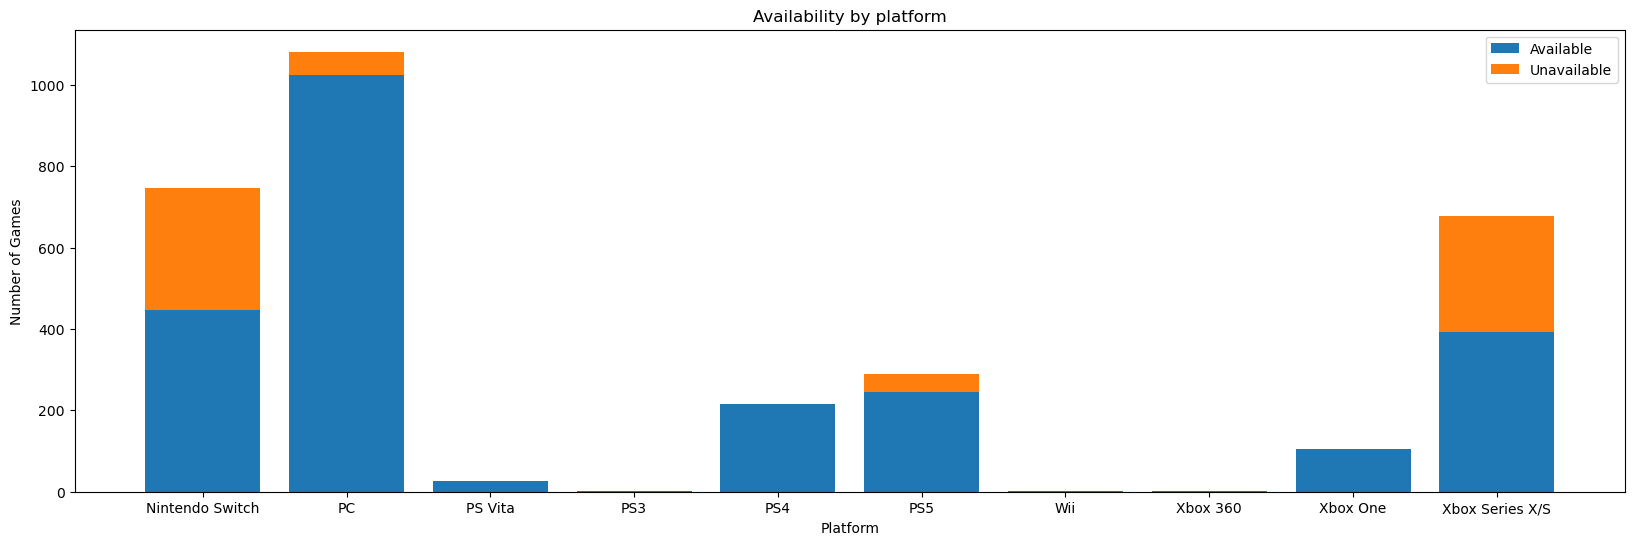

In [62]:
# Count number of games available for each console
available_counts = df.groupby('Platform')['Availability'].sum()

# Count number of games unavailable for each console
unavailable_counts = df.groupby('Platform')['Availability'].count() - available_counts

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(20, 6))

ax.bar(available_counts.index, available_counts, label='Available')
ax.bar(unavailable_counts.index, unavailable_counts, bottom=available_counts, label='Unavailable')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Games')
ax.legend()
plt.title('Availability by platform')
plt.show()

Looking at the title availability by platform, it is clear that Xbox Series X/S and Switch games have the highest rates of shortages, which could be due to many pre-order title listings. It is a lesser issue for the PC/PS5 markets, and the older generation of consoles seem to have no shortage concerns at all. 

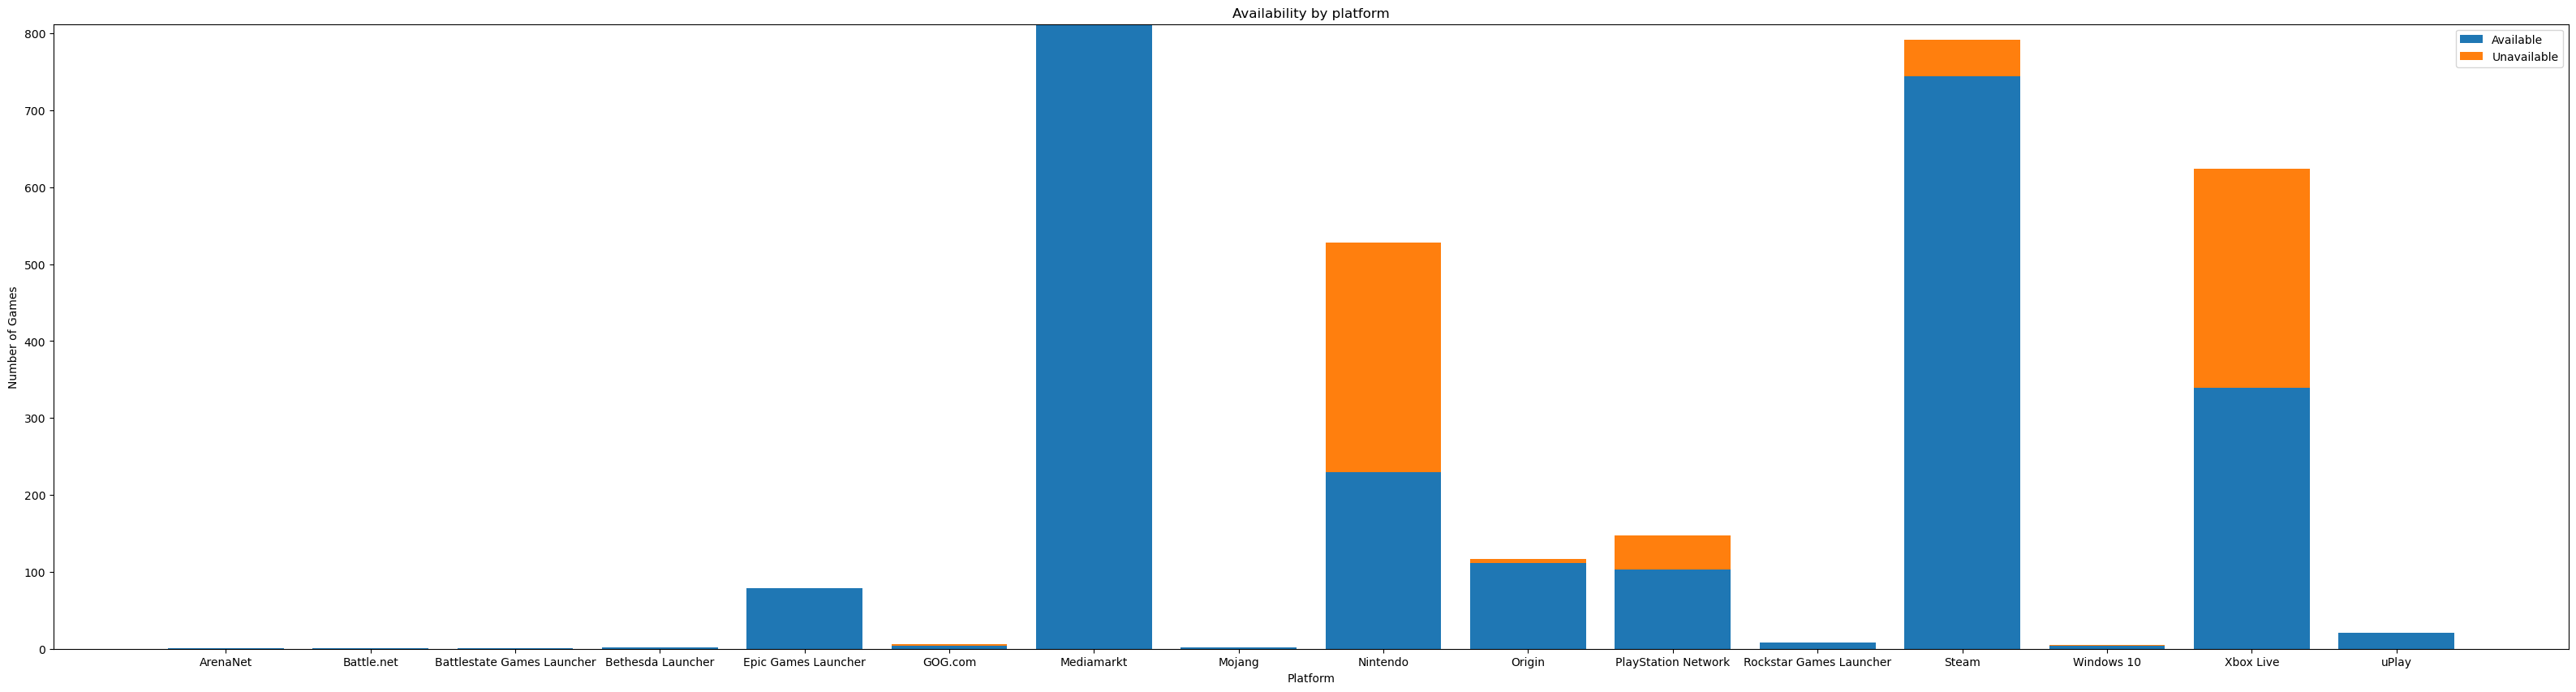

In [63]:
# Count number of games available for each console
available_counts1 = df.groupby('Retailer')['Availability'].sum()

# Count number of games unavailable for each console
unavailable_counts1 = df.groupby('Retailer')['Availability'].count() - available_counts1

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(40, 10))

ax.bar(available_counts1.index, available_counts1, label='Available')
ax.bar(unavailable_counts1.index, unavailable_counts1, bottom=available_counts1, label='Unavailable')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Games')
ax.legend()
plt.title('Availability by platform')
plt.show()

Online retailers seem to have the highest number of title shortages. That can be explained by large amounts of games being listed as pre-orders for customers to purchase that are not available to download until release date.

In [64]:
publisher_counts = df['Developer'].value_counts().sort_values(ascending=False)
publisher_counts

Nintendo               334
Electronic Arts        253
Ubisoft                174
Square Enix            145
Microsoft              111
                      ... 
Funbox Media Ltd         1
Zoink Games              1
Topware Interactive      1
Kasedo Games             1
Team Cherry              1
Name: Developer, Length: 328, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


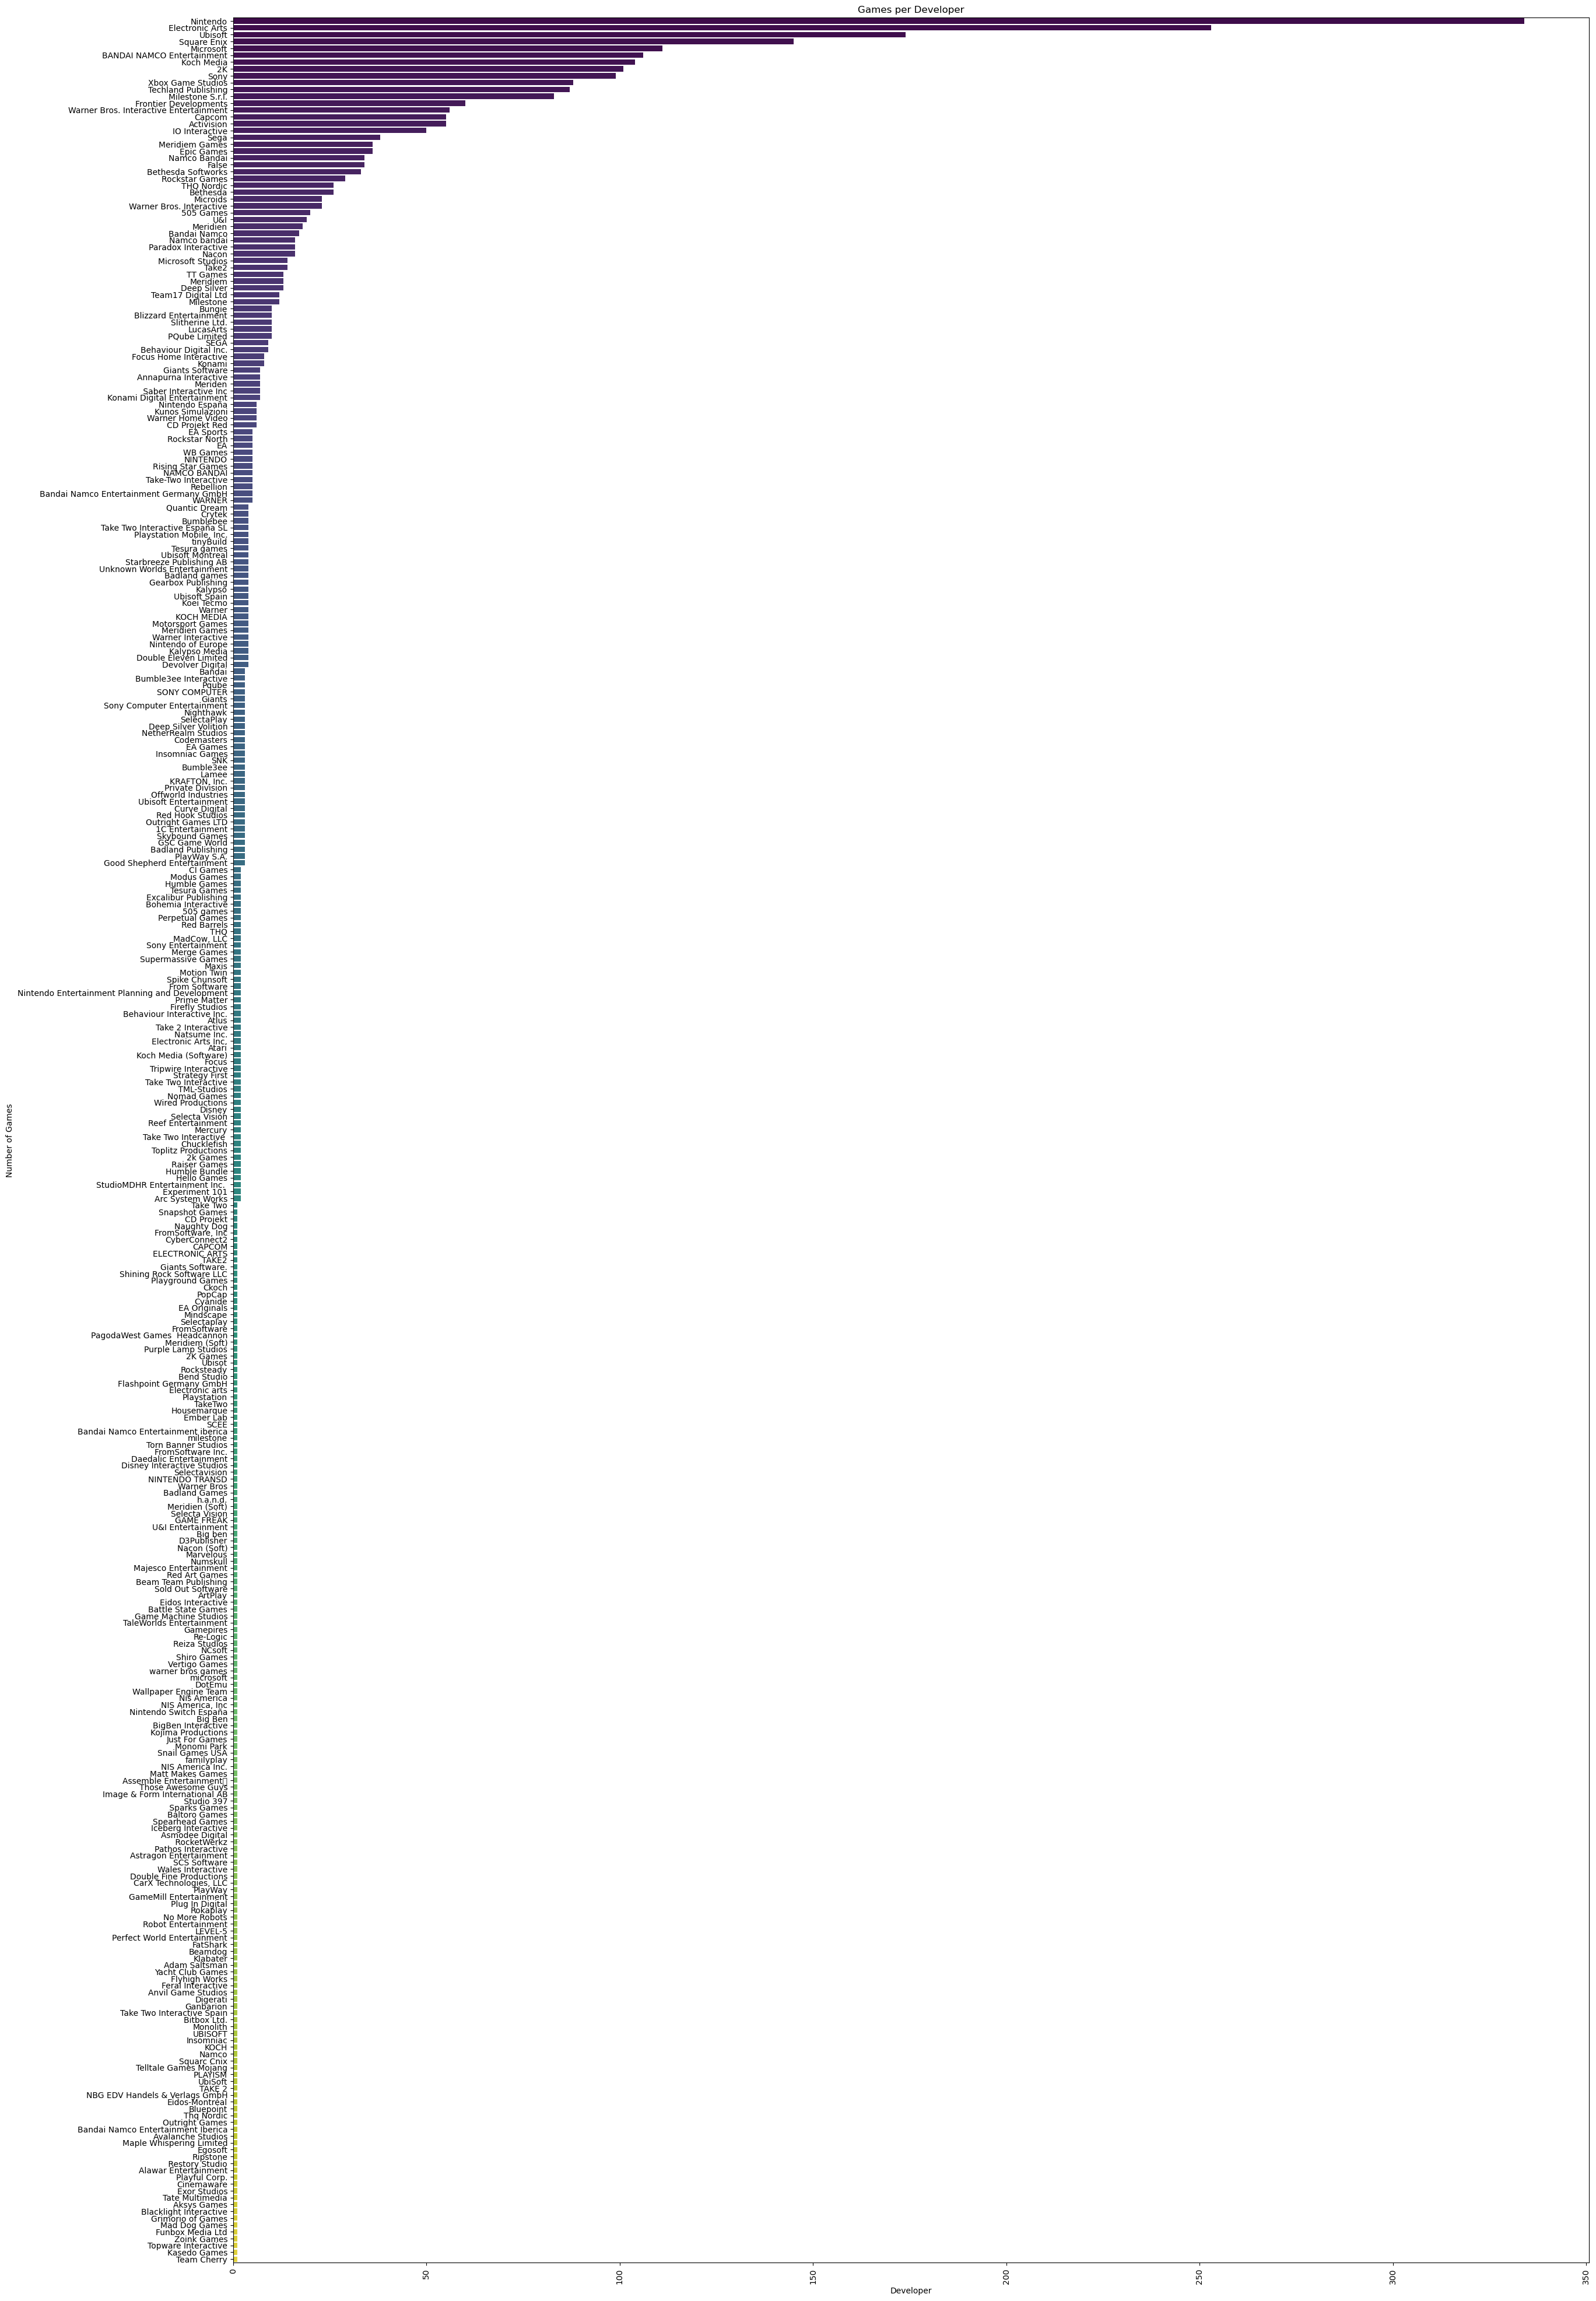

In [65]:
plt.figure(figsize=(30, 50))  # set figure size
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis')
plt.xticks(rotation=90)  # rotate x-axis labels
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.title('Games per Developer')
plt.show()

The publisher with the highest number of titles listed is Nintendo, followed by Electronic Arts, Ubisoft, Square Enix and 2K.

In [66]:
retailer_counts = df['Retailer'].value_counts().sort_values(ascending=False)
retailer_counts

Mediamarkt                    812
Steam                         792
Xbox Live                     624
Nintendo                      528
PlayStation Network           147
Origin                        117
Epic Games Launcher            79
uPlay                          21
Rockstar Games Launcher         8
GOG.com                         6
Windows 10                      5
Mojang                          2
Bethesda Launcher               2
Battle.net                      1
ArenaNet                        1
Battlestate Games Launcher      1
Name: Retailer, dtype: int64

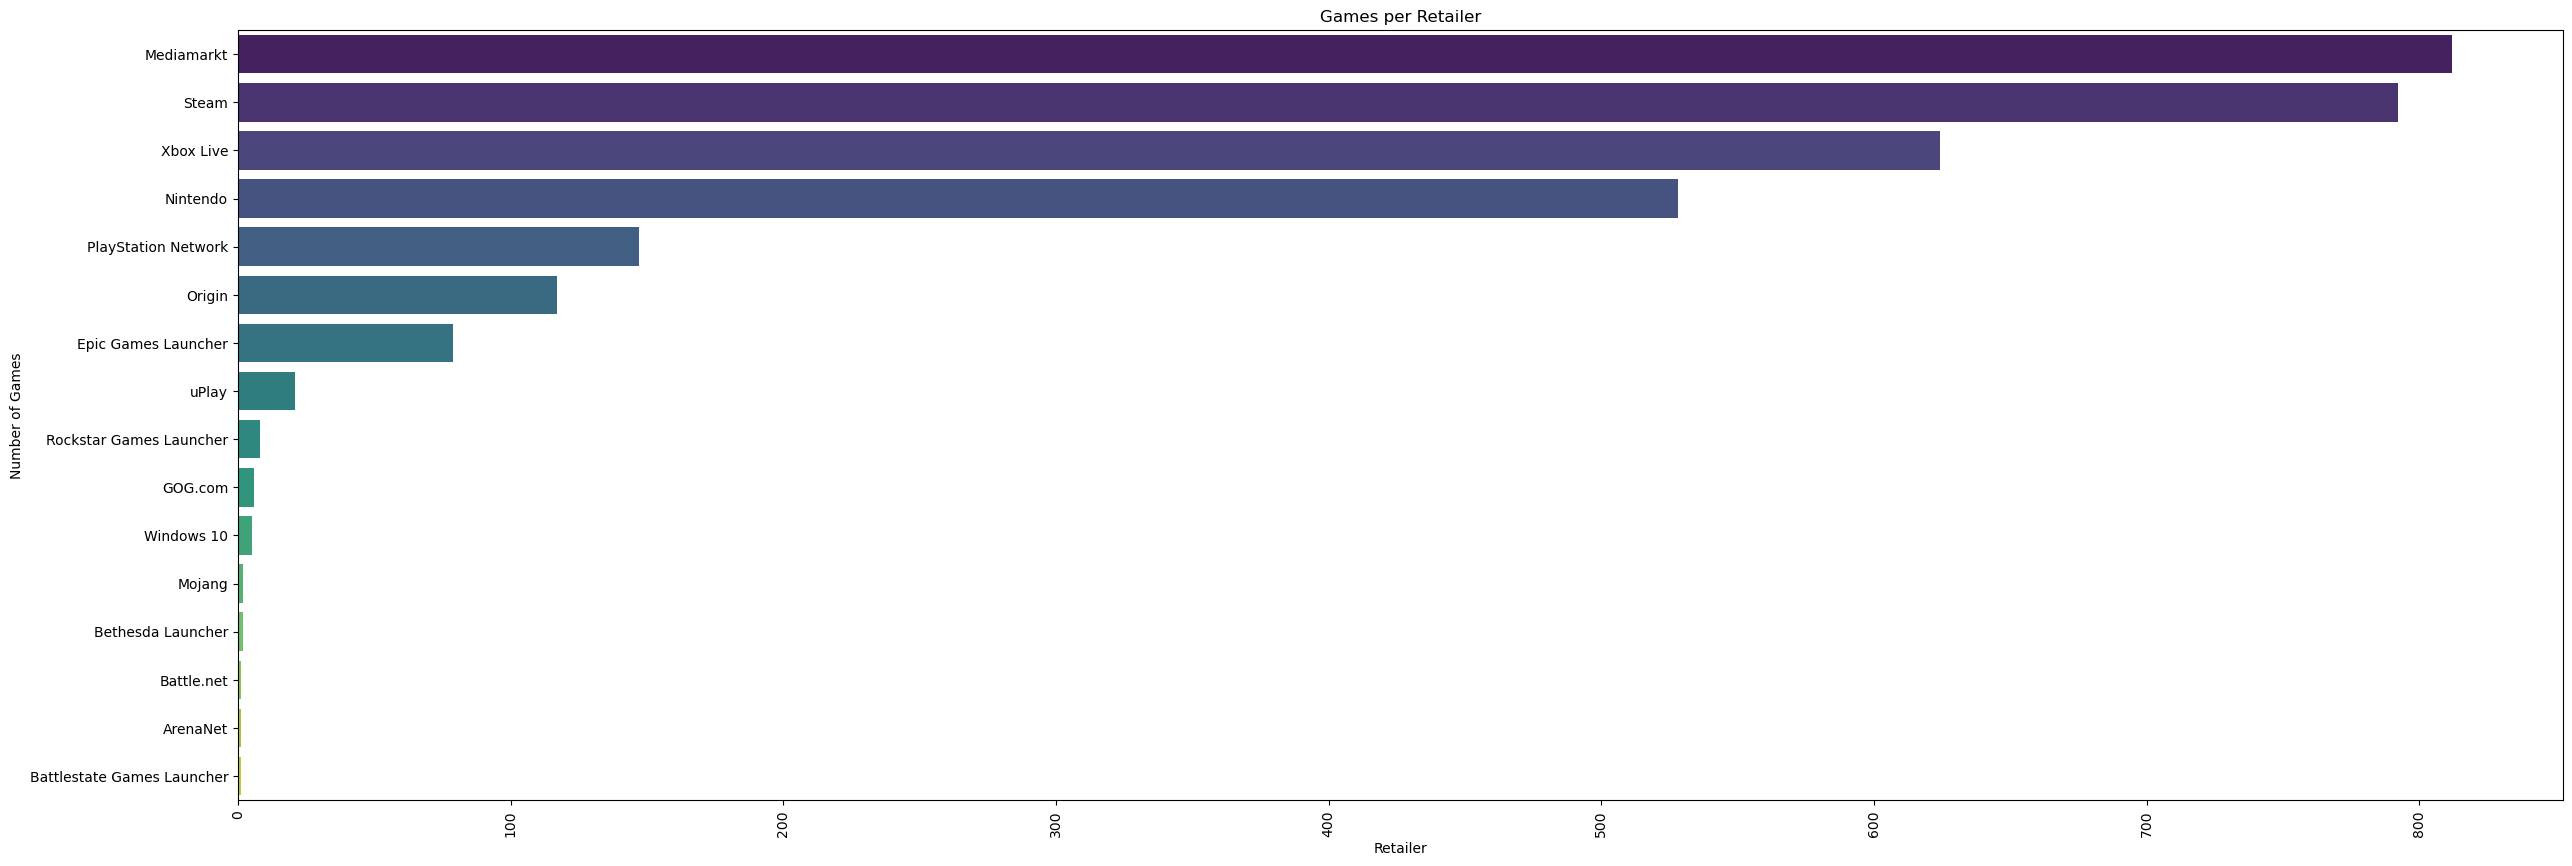

In [67]:
plt.figure(figsize=(30, 10))  # set figure size
sns.barplot(x=retailer_counts.values, y=retailer_counts.index, palette='viridis')
plt.xticks(rotation=90)  # rotate x-axis labels
plt.xlabel('Retailer')
plt.ylabel('Number of Games')
plt.title('Games per Retailer')
plt.show()

Analyzing the retailer side, physical retailer Mediamarkt has the largest count of games for all different platforms offered, followed by digital retailers Steam and Xbox Live. 

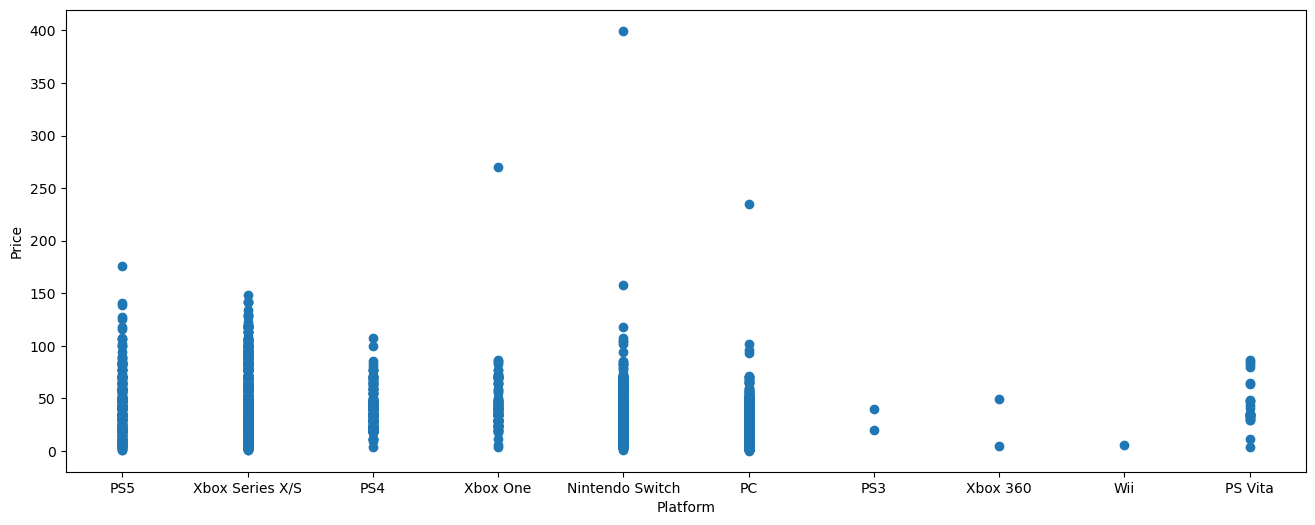

In [68]:
plt.figure(figsize=(16, 6))
plt.scatter(df['Platform'], df['Price_USD'])
plt.xlabel('Platform')
plt.ylabel('Price')
plt.show()

In [69]:
ranked_price_by_platform = df.sort_values(['Platform', 'Price_USD'], ascending=[True, False])
print(ranked_price_by_platform)

        Format    Retailer        Developer         Platform  \
3137   Digital    Nintendo       Epic Games  Nintendo Switch   
3227   Digital    Nintendo         Nintendo  Nintendo Switch   
936   Physical  Mediamarkt   Selecta Visión  Nintendo Switch   
3327   Digital    Nintendo       Epic Games  Nintendo Switch   
975   Physical  Mediamarkt  Nintendo España  Nintendo Switch   
...        ...         ...              ...              ...   
2031   Digital   Xbox Live        Microsoft  Xbox Series X/S   
2034   Digital   Xbox Live        Microsoft  Xbox Series X/S   
2070   Digital   Xbox Live        Microsoft  Xbox Series X/S   
1994   Digital   Xbox Live        Microsoft  Xbox Series X/S   
2029   Digital   Xbox Live        Microsoft  Xbox Series X/S   

                                                  Title  Availability  \
3137              Fortnite - Wildcat Bundle Switch (EU)             1   
3227         Fire Emblem: Three Houses Switch (EU & UK)             0   
936         

We can observe that some of the outliers in the Price column are bundles of the Switch with a certain game.

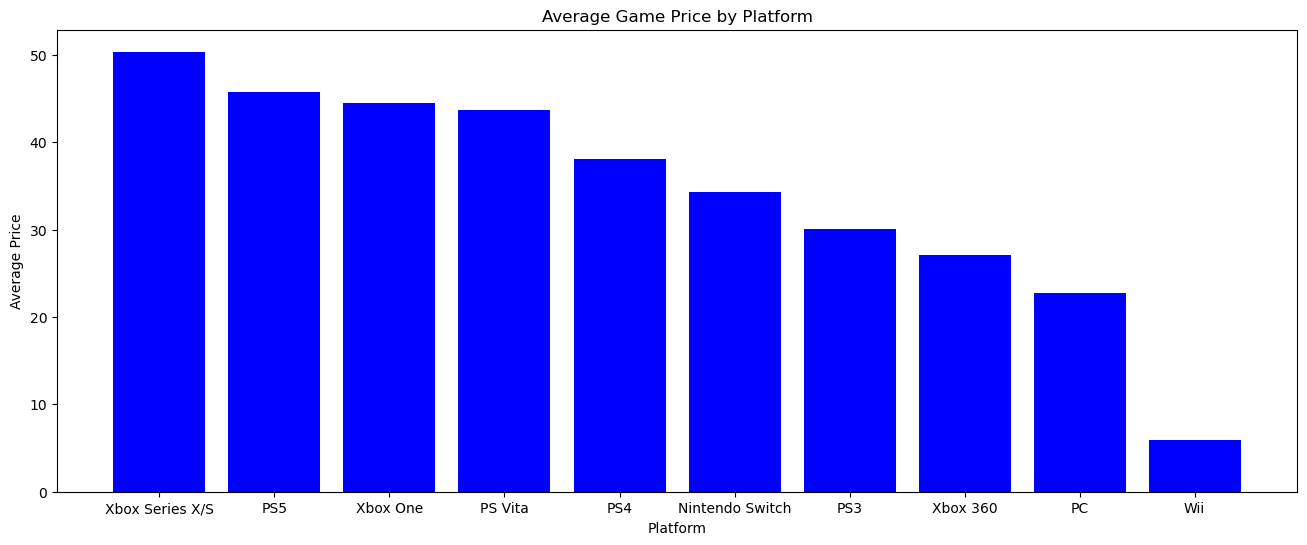

In [70]:
platform_mean_price = df.groupby('Platform')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
plt.bar(platform_mean_price.index, platform_mean_price.values, color='blue')
plt.title('Average Game Price by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Price')
plt.show()

The newest generation consoles have the highest priced games, while older generation games are cheaper. PC games have relatively low prices, mainly due to the intense competition between the biggest online retailers Steam, Epic and GOG which allows them to offer deep discounts. 

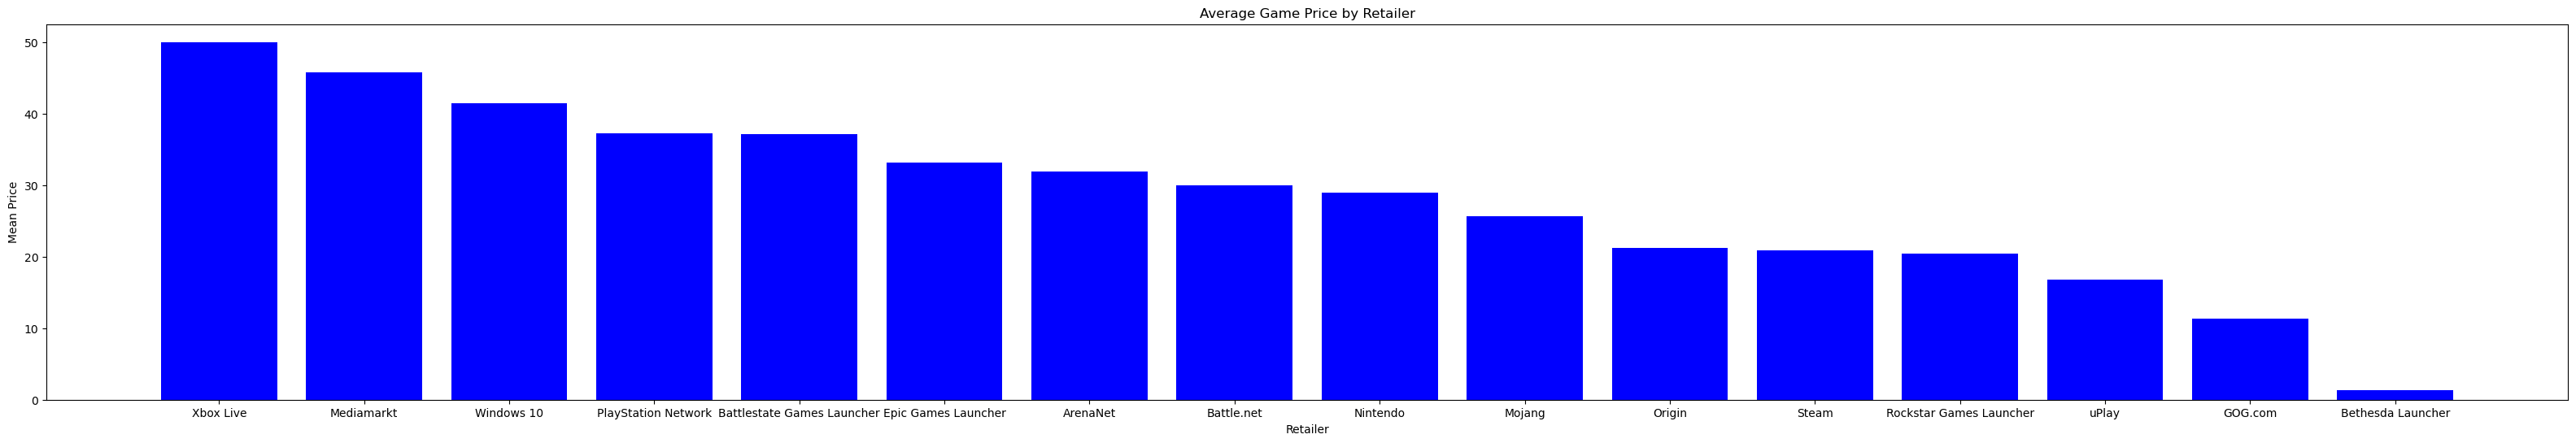

In [71]:
platform_mean_price = df.groupby('Retailer')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(40, 6))
plt.bar(platform_mean_price.index, platform_mean_price.values, color='blue')
plt.title('Average Game Price by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Mean Price')
plt.show()

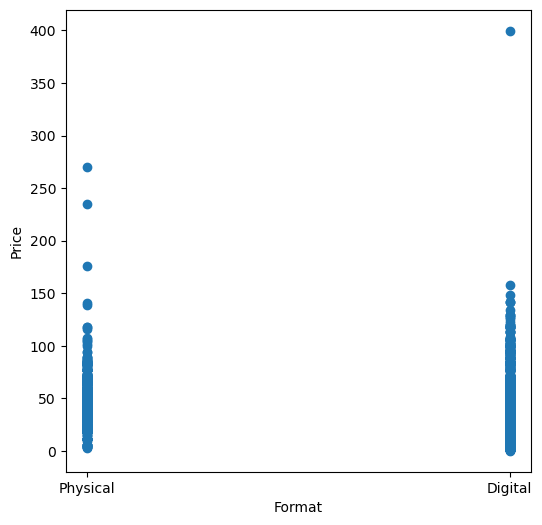

In [72]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Format'], df['Price_USD'])
plt.xlabel('Format')
plt.ylabel('Price')
plt.show()

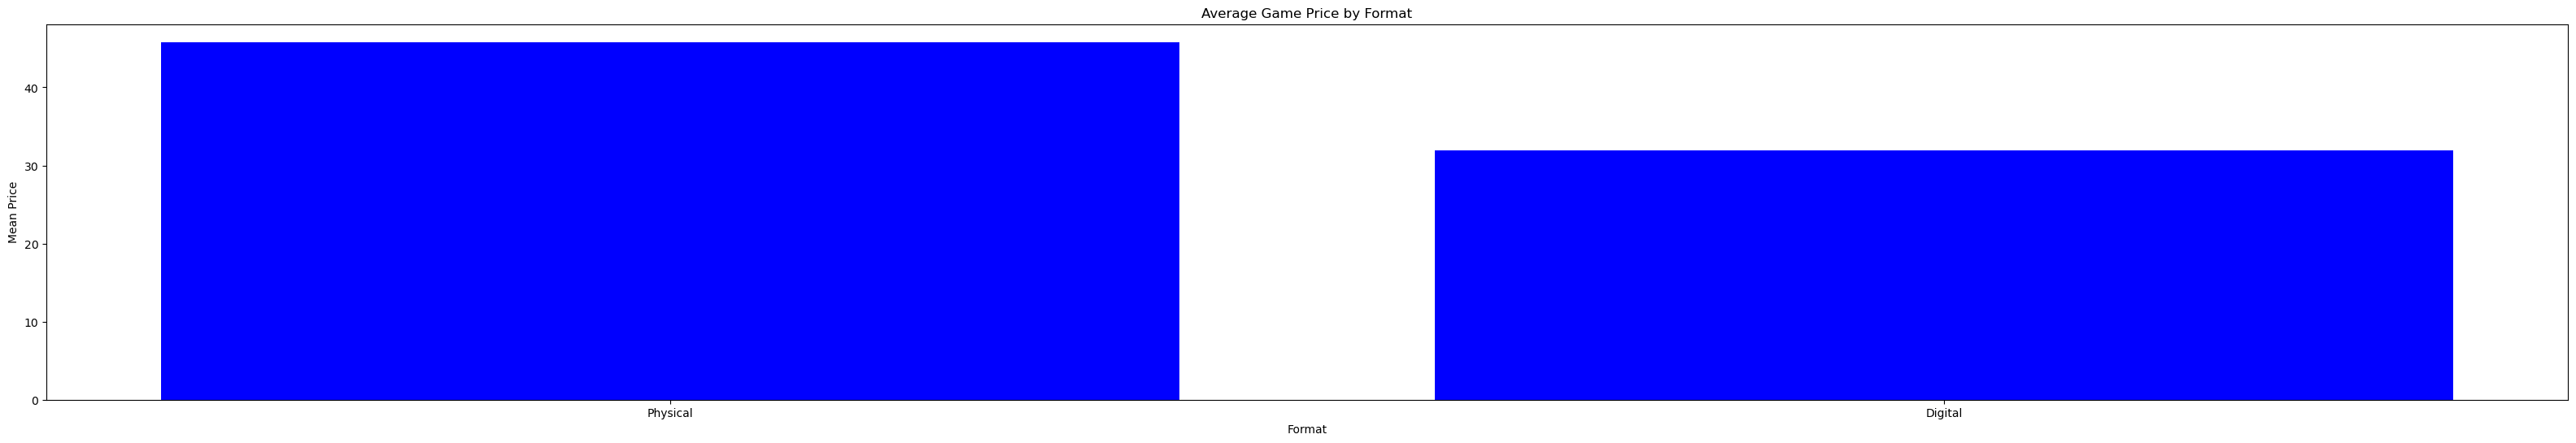

In [73]:
format_mean_price = df.groupby('Format')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(40, 6))
plt.bar(format_mean_price.index, format_mean_price.values, color='blue')
plt.title('Average Game Price by Format')
plt.xlabel('Format')
plt.ylabel('Mean Price')
plt.show()

It is clear that digital game copies have the lower average price and are a better choice for the customer when purchasing a game.

In [74]:
max_price_row = df.loc[df['Price_USD'].idxmax()]
max_price_row

Format                                        Digital
Retailer                                     Nintendo
Developer                                  Epic Games
Platform                              Nintendo Switch
Title           Fortnite - Wildcat Bundle Switch (EU)
Availability                                        1
Price_USD                                    399.7722
Name: 3137, dtype: object

In [75]:
highest_price_pc = df[df['Platform'] == 'PC'].sort_values('Price_USD', ascending=False).iloc[0]
print(highest_price_pc)

Format                                           Physical
Retailer                                       Mediamarkt
Developer                                   Quantic Dream
Platform                                               PC
Title           Detroit: Become Human Collector's Edition
Availability                                            1
Price_USD                                          234.82
Name: 1009, dtype: object


In [76]:
highest_price_steam = df[df['Retailer'] == 'Steam'].sort_values('Price_USD', ascending=False).iloc[0]
print(highest_price_steam)

Format                             Digital
Retailer                             Steam
Developer                               2K
Platform                                PC
Title           WWE 2K22 Deluxe Edition PC
Availability                             1
Price_USD                          95.6862
Name: 1564, dtype: object


### SQL queries

In [89]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [90]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [91]:
%sql sqlite:///my_data1.db

In [92]:
df.to_sql("GAMES", con, if_exists='replace', index=False,method="multi")

3146

In [93]:
df.head()

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,1,50.7282
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,1,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,1,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,1,41.2882
5,Physical,Mediamarkt,Take Two Interactive,PS5,The Quarry,1,88.4882


In [108]:
query = "SELECT DISTINCT Platform FROM GAMES;"
cur.execute(query)
platforms = cur.fetchall()
print("Unique Platforms:")
for pf in platforms:
    print(pf[0])

Unique Platforms:
PS5
Xbox Series X/S
PS4
Xbox One
Nintendo Switch
PC
PS3
Xbox 360
Wii
PS Vita


In [113]:
query = "SELECT * FROM GAMES WHERE Title LIKE 'Assassin%' ORDER BY Price_USD LIMIT 5;"
cur.execute(query)

results = cur.fetchall()
for result in results:
    print(result)

('Digital', 'uPlay', 'Ubisoft', 'PC', "Assassin's Creed 2 PC", 1, 3.2922)
('Digital', 'uPlay', 'Ubisoft', 'PC', "Assassin's Creed: Director's Cut Edition PC (EU & UK)", 1, 3.5282)
('Digital', 'Xbox Live', 'Ubisoft', 'Xbox Series X/S', "Assassin's Creed Unity Xbox One - Digital Code", 1, 4.1182)
('Digital', 'Xbox Live', 'Ubisoft', 'Xbox Series X/S', "Assassin's Creed Unity Xbox One - Digital Code", 1, 4.1182)
('Digital', 'uPlay', 'Ubisoft', 'PC', "Assassin's Creed Unity PC", 1, 4.9442)


In [116]:
query = "SELECT Platform, COUNT(Platform) FROM GAMES GROUP BY Platform;"

cur.execute(query)
result = cur.fetchall()
for outcome, count in result:
    print("Outcome: {}\tCount: {}".format(outcome, count))

Outcome: Nintendo Switch	Count: 745
Outcome: PC	Count: 1081
Outcome: PS Vita	Count: 26
Outcome: PS3	Count: 2
Outcome: PS4	Count: 216
Outcome: PS5	Count: 290
Outcome: Wii	Count: 1
Outcome: Xbox 360	Count: 2
Outcome: Xbox One	Count: 105
Outcome: Xbox Series X/S	Count: 678


In [122]:
query = "SELECT Title FROM GAMES WHERE Price_USD >= 99.99;"

cur.execute(query)
result = cur.fetchall()
for r in result:
    print(r[0])

Gran Turismo 7: Edición 25 Aniversario
Back 4 Blood: Delux Edición
NBA 2K22
Beyond a Steel Sky - Utopia Edition
Call Of The Sea
NBA 2K22 75th Anniversary
Sackboy: Una aventura a lo grande Ed. Especial
Back 4 Blood: Delux Edición
Cyberpunk 2077
Mario Kart Live: Home Circuit + Coche Luigi
Mario Kart Live: Home Circuit + Coche Mario
Aeterna Noctis
Fire Emblem Warriors: Three Hopes
Detroit: Become Human Collector's Edition
FIFA 22 Ultimate Team 12000 Points Pack PC
Tarjeta PlayStation Network (PSN) - 100 EUR (España)
Call of Duty Black Ops Cold War - Ultimate Edition PS4/PS5 (EU)
FIFA 21 Ultimate Team 12000 Points Pack PS4/PS5 (Spain)
Anthem 12000 Shards PS4 (Spain)
Apex Legends 11500 Coins PS4 (Spain)
NBA 2K22 450,000 VC Xbox One/ Xbox Series X|S
Tiny Tina's Wonderlands: Chaotic Great Edition Xbox One & Xbox Series X|S (WW)
Sniper Elite 5 Deluxe Edition Xbox One/Xbox Series X|S (EU & UK)
Sniper Elite 5 Deluxe Edition Xbox One/Xbox Series X|S (WW)
Sniper Elite 4 Digital Deluxe Edition Xbox

In [129]:
query = "SELECT Title, Retailer, Price_USD FROM GAMES WHERE Title LIKE 'Assassin%' AND Platform = 'PS5';"
cur.execute(query)
results = cur.fetchall()
for result in results:
    print(result)

("Assassin's Creed Valhalla: El Amanecer del Ragnarök", 'Mediamarkt', 41.2882)
('Assassin`s Creed Valhalla PS5', 'Mediamarkt', 35.3882)


# Machine Learning

In [48]:
df1 = df[['Format', 'Retailer', 'Developer', 'Platform', 'Price_USD']]

In [49]:
df1.head()

,Format,Retailer,Developer,Platform,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,50.7282
1,Physical,Mediamarkt,Sony,PS5,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,41.2882
5,Physical,Mediamarkt,Take Two Interactive,PS5,88.4882


In [50]:
cat_vars = ['Format', 'Retailer', 'Developer', 'Platform']
data = pd.get_dummies(df1, columns=cat_vars, prefix=cat_vars)

In [51]:
y = df1['Price_USD']
X = data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=58)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2202, 357), (944, 357), (2202,), (944,))

### Linear Regression

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_lr_pred = lr.predict(X_test)

mae_lr =  mean_absolute_error(y_test, y_lr_pred)
mse_lr = mean_squared_error(y_test, y_lr_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_lr_pred)

print("Mean Absolute Error: ", mae_lr)
print("Mean Squared Error: ", mse_lr)
print("Root Mean Squared Error: ", rmse_lr)
print("R-squared: ", r2_lr)

Mean Absolute Error:  0.0008793579463149482
Mean Squared Error:  0.00013164597663601875
Root Mean Squared Error:  0.01147370805956029
R-squared:  0.9999997805854077


Great results, however model is most likely overfitting to the training data with R2 value being so high.

In [54]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

Training MSE:  8.212205482430312e-26
Testing MSE:  0.00013164597663601875
Training R-squared:  1.0
Testing R-squared:  0.9999997805854077


Model is definitely overfitting the training data, will apply lasso model instead.

In [55]:
from sklearn.linear_model import Lasso

# create Lasso object
lasso = Lasso(alpha=95)

# fit the model to the training data
lasso.fit(X_train, y_train)

# make predictions on the testing data
lasso_y_pred = lasso.predict(X_test)

# calculate performance metrics
mae_lasso = mean_absolute_error(y_test, lasso_y_pred)
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_y_pred)

# print performance metrics
print('Mean Absolute Error: ', mae_lasso)
print('Mean Squared Error: ', mse_lasso)
print('Root Mean Squared Error: ', rmse_lasso)
print('R-squared: ', r2_lasso)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print("Lasso Regression Train Score:", train_score)
print("Lasso Regression Test Score:", test_score)

Mean Absolute Error:  2.460657669215134
Mean Squared Error:  9.552440019969955
Root Mean Squared Error:  3.0907021888189026
R-squared:  0.9840789305853276
Lasso Regression Train Score: 0.9841242052924617
Lasso Regression Test Score: 0.9840789305853276


After a few iterations I settled on this Lasso model which performs much better than the LinReg model above and seems to not be overfitting.
MSE and RMSE values indicate that the Lasso model is making some errors however they are rather small. 
The train and test scores are similar which suggests that the model is performing well on both training and testing data and not overfitting.

### Decision Tree

In [56]:
dt = DecisionTreeRegressor(max_depth = 6)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [58]:
y_dt_pred = dt.predict(X_test)

mae_dt =  mean_absolute_error(y_test, y_dt_pred)
mse_dt = mean_squared_error(y_test, y_dt_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_dt_pred)

print("Mean Absolute Error: ", mae_dt)
print("Mean Squared Error: ", mse_dt)
print("Root Mean Squared Error: ", rmse_dt)
print("R-squared: ", r2_dt)

Mean Absolute Error:  0.37009360423185433
Mean Squared Error:  0.43522535772130416
Root Mean Squared Error:  0.6597161190400793
R-squared:  0.9992746090928788


In [59]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

Training MSE:  0.5017100369848241
Testing MSE:  0.43522535772130416
Training R-squared:  0.999334578358533
Testing R-squared:  0.9992746090928788


DT is performing rather well with depth limited to 6. The training and testing R2 scores are above 0.99, which suggests that the model is fitting the data very well, and is most likely overfitting the training data.
Attempted pruning but that returned even worse results.

### Random Forest Regressor

In [60]:
rf = RandomForestRegressor(n_estimators=200, random_state=82)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=82)

In [61]:
y_rf_pred = rf.predict(X_test)

mae_fr =  mean_absolute_error(y_test, y_rf_pred)
mse_fr = mean_squared_error(y_test, y_rf_pred)
rmse_fr = np.sqrt(mse_fr)
r2_fr = r2_score(y_test, y_rf_pred)

print("Mean Absolute Error: ", mae_fr)
print("Mean Squared Error: ", mse_fr)
print("Root Mean Squared Error: ", rmse_fr)
print("R-squared: ", r2_fr)

Mean Absolute Error:  0.02934613135598232
Mean Squared Error:  0.01753181292020694
Root Mean Squared Error:  0.13240775249284664
R-squared:  0.9999707796950429


In [62]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)
print("Training R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

Training MSE:  3.3316626307238306
Testing MSE:  0.01753181292020694
Training R-squared:  0.9955811918177399
Testing R-squared:  0.9999707796950429


Increasing the complexity did not make much of a difference so I settled on 200 estimatiors.
The testing and training R2 values are pretty high and the model doesn't seem to be overfitting.

### Gradient Boosting

In [63]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=82)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=82)

In [64]:
y_gbr_pred = gbr.predict(X_test)

mae_gbr =  mean_absolute_error(y_test, y_gbr_pred)
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_gbr_pred)

print("Mean Absolute Error: ", mae_gbr)
print("Mean Squared Error: ", mse_gbr)
print("Root Mean Squared Error: ", rmse_gbr)
print("R-squared: ", r2_gbr)

Mean Absolute Error:  0.0975505260278981
Mean Squared Error:  0.034411591233592186
Root Mean Squared Error:  0.18550361514965735
R-squared:  0.9999426461373687


In [65]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

Training MSE:  0.016154501152996974
Testing MSE:  0.034411591233592186
Training R-squared:  0.9999785741685797
Testing R-squared:  0.9999426461373687


Model seems to be performing well, probably slightly overfitting the testing data.

### Support Vector Regressor

In [66]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [67]:
y_svr_pred = svr.predict(X_test)

mae_svr =  mean_absolute_error(y_test, y_svr_pred)
mse_svr = mean_squared_error(y_test, y_svr_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_svr_pred)

print("Mean Absolute Error: ", mae_svr)
print("Mean Squared Error: ", mse_svr)
print("Root Mean Squared Error: ", rmse_svr)
print("R-squared: ", r2_svr)

Mean Absolute Error:  0.16670451554728904
Mean Squared Error:  0.028417855601648508
Root Mean Squared Error:  0.16857596389061077
R-squared:  0.9999526359076106


In [68]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

Training MSE:  0.016154501152996974
Testing MSE:  0.034411591233592186
Training R-squared:  0.9999785741685797
Testing R-squared:  0.9999426461373687


Overall, SVR model is performing well and is able to make accurate predictions on both the training and testing data.

In [69]:
metrics_df = pd.DataFrame({'Model': ['Linear Regression', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
                           'Mean Absolute Error': [mae_lr, mae_lasso, mae_dt, mae_fr, mae_gbr, mae_svr],
                           'Mean Squared Error': [mse_lr, mse_lasso, mse_dt, mse_fr, mse_gbr, mse_svr],
                           'Root Mean Squared Error': [rmse_lr, rmse_lasso, rmse_dt, rmse_fr, rmse_gbr, rmse_svr],
                           'R-squared': [r2_lr, r2_lasso, r2_dt, r2_fr, r2_gbr, r2_svr]})
metrics_df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Linear Regression,0.000879,0.000132,0.011474,1.000000
1,Lasso,2.460658,9.552440,3.090702,0.984079
2,Decision Tree,0.370094,0.435225,0.659716,0.999275
3,Random Forest,0.029346,0.017532,0.132408,0.999971
4,Gradient Boosting,0.097551,0.034412,0.185504,0.999943
5,SVR,0.166705,0.028418,0.168576,0.999953


Overall, Random Forest and Gradient Boosing models performed best. Some parameter adjustment might yield even better results.

# Plotly chart

In [70]:
df.head()

,Format,Retailer,Developer,Platform,Title,Availability,Price_USD
0,Physical,Mediamarkt,Capcom,PS5,Resident Evil VIII: Village Lenticular,1,50.7282
1,Physical,Mediamarkt,Sony,PS5,Sackboy: A Big Adventure,1,70.7882
2,Physical,Mediamarkt,Ubisoft,PS5,Tom Clancy's Rainbow Six Siege,1,11.7882
3,Physical,Mediamarkt,Ubisoft,PS5,Assassin's Creed Valhalla: El Amanecer del Rag...,1,41.2882
5,Physical,Mediamarkt,Take Two Interactive,PS5,The Quarry,1,88.4882


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Calculate number of games per retailer
games_per_retailer = df.groupby('Retailer').size()

# Calculate number of games per platform and developer
games_per_platform_developer = df.groupby(['Platform', 'Developer']).size().unstack(fill_value=0)

# Get the list of platforms for the dropdown
platforms = ['All'] + list(df['Platform'].unique())

# Create the app object
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1('Video Games Sales Dashboard'),
    
    # Add the dropdown menu
    dcc.Dropdown(
        id='platform-dropdown',
        options=[{'label': platform, 'value': platform} for platform in platforms],
        value='All',
        placeholder='Select a platform',
        clearable=False
    ),
    
    # Add the pie chart
    dcc.Graph(id='games-per-retailer'),
    
    # Add the heatmap
    dcc.Graph(id='games-per-platform-developer'),
])

# Define the callback function for the pie chart
@app.callback(
    Output('games-per-retailer', 'figure'),
    [Input('platform-dropdown', 'value')]
)
def update_games_per_retailer(platform):
    # Filter the data by platform if a specific platform is selected
    if platform != 'All':
        filtered_df = df[df['Platform'] == platform]
        games_per_retailer = filtered_df.groupby('Retailer').size()
    else:
        games_per_retailer = df.groupby('Retailer').size()
    
    # Create the pie chart
    data = [go.Pie(labels=games_per_retailer.index, values=games_per_retailer.values)]

    layout = go.Layout(title='Number of Games per Retailer')

    fig = go.Figure(data=data, layout=layout)
    
    return fig

# Define the callback function for the heatmap
@app.callback(
    Output('games-per-platform-developer', 'figure'),
    [Input('platform-dropdown', 'value')]
)
def update_games_per_platform_developer(platform):
    # Filter the data by platform if a specific platform is selected
    if platform != 'All':
        filtered_df = df[df['Platform'] == platform]
        games_per_platform_developer = filtered_df.groupby(['Platform', 'Developer']).size().unstack(fill_value=0)
    else:
        games_per_platform_developer = df.groupby(['Platform', 'Developer']).size().unstack(fill_value=0)
    
    # Create the heatmap
    data = [go.Heatmap(
        x=games_per_platform_developer.columns,
        y=games_per_platform_developer.index,
        z=games_per_platform_developer.values,
        colorscale='Viridis'
    )]

    layout = go.Layout(
        title='Number of Games per Platform and Developer',
        xaxis={'title': 'Developer'},
        yaxis={'title': 'Platform'}
    )

    fig = go.Figure(data=data, layout=layout)
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


C:\Users\chris\AppData\Local\Temp\ipykernel_18364\649936277.py:5: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\chris\AppData\Local\Temp\ipykernel_18364\649936277.py:6: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 09:24:30] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js 